import library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error , mean_absolute_error ,median_absolute_error , f1_score

Data Extraction

In [3]:
df = pd.read_csv('../input/room-occupancy/file.csv')

In [4]:
df.shape

(2665, 6)

In [5]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [6]:
df.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2660,24.290000,25.700000,808.0,1150.25,0.004829,1
2661,24.330000,25.736000,809.8,1129.20,0.004848,1
2662,24.330000,25.700000,817.0,1125.80,0.004841,1
2663,24.356667,25.700000,813.0,1123.00,0.004849,1
2664,24.408333,25.681667,798.0,1124.00,0.004860,1


In [7]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.0 KB


no null value

In [9]:
df.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [10]:
df.Occupancy.unique()

array([1, 0])

In [11]:
df['Occupancy'].value_counts()

0    1693
1     972
Name: Occupancy, dtype: int64

<AxesSubplot:xlabel='Occupancy', ylabel='count'>

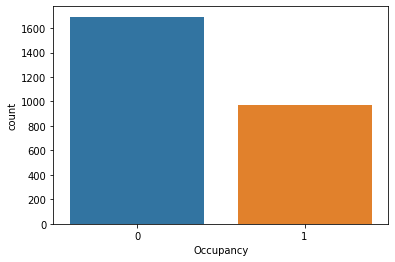

In [12]:
sns.countplot(data = df , x = 'Occupancy')

In [13]:
df.isnull()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2660,False,False,False,False,False,False
2661,False,False,False,False,False,False
2662,False,False,False,False,False,False
2663,False,False,False,False,False,False


In [14]:
df.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

<AxesSubplot:xlabel='Temperature', ylabel='Humidity'>

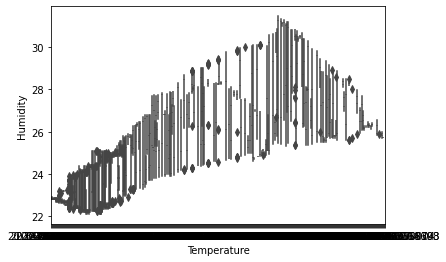

In [15]:
sns.boxplot(x='Temperature' , y='Humidity' , data=df)

<AxesSubplot:xlabel='Light', ylabel='CO2'>

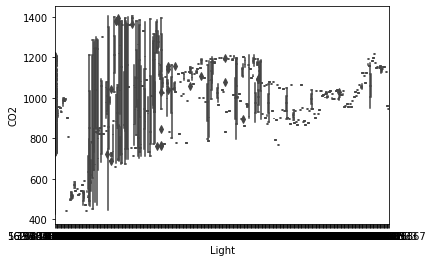

In [16]:
sns.boxplot(x='Light' , y='CO2' , data=df)

<AxesSubplot:>

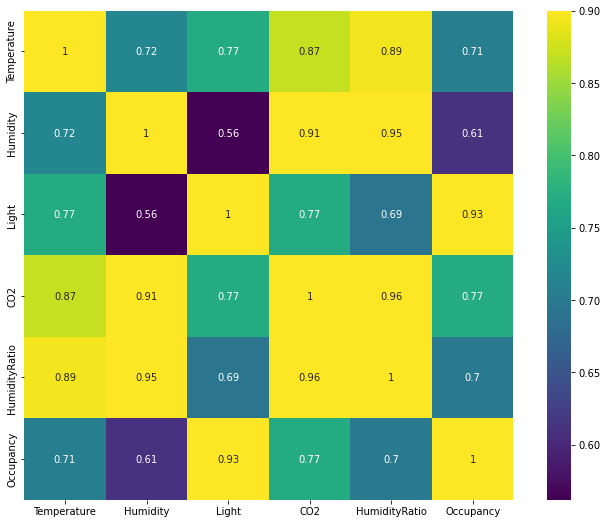

In [17]:
plt.figure(figsize = (12,9))
sns.heatmap(df.corr(), vmax = 0.9, square = True , annot=True , cmap= 'viridis')

there positive corr

<Figure size 1500x900 with 0 Axes>

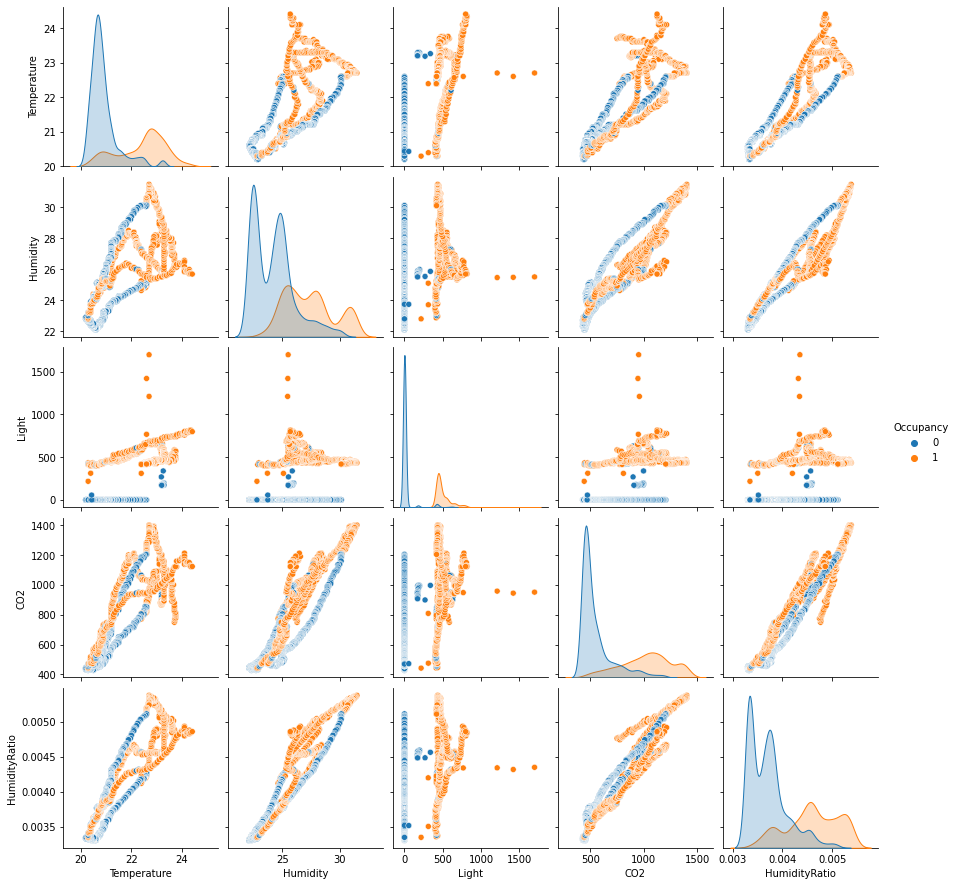

In [18]:
plt.figure(figsize=(10,6),dpi = 150)
sns.pairplot(df , hue = 'Occupancy')

divid the data to X and y : 

In [19]:

X = df.drop('Occupancy', axis = 1)
y = df['Occupancy']

In [20]:
#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
print('X \n' , X[:10])

X 
 [[2.20476235 0.37681367 1.56686218 0.10694007 1.20754022]
 [2.22227495 0.38420166 1.53968001 0.14521407 1.22146086]
 [2.23395002 0.35957501 1.51676171 0.17688126 1.20916118]
 [2.2266531  0.31647838 1.20130193 0.19425264 1.17413962]
 [2.25730015 0.34726169 1.18071543 0.20877626 1.21152244]
 [2.26313769 0.37188834 1.50077219 0.2463668  1.23238944]
 [2.23395002 0.38420166 1.37152362 0.27370538 1.22715386]
 [2.25730015 0.38420166 1.26226195 0.27028806 1.23855084]
 [2.25730015 0.40882831 1.13034846 0.29147545 1.25657056]
 [2.23978755 0.42524608 1.26625933 0.31129592 1.26000194]]


In [21]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, shuffle =True)


print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1865, 5)
X_test shape is  (800, 5)
y_train shape is  (1865,)
y_test shape is  (800,)


In [23]:
#Applying SVC Model 
SVCModel = SVC(kernel= 'rbf', max_iter=1000000,C=1,gamma=0.001)
SVCModel.fit(X_train, y_train)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))


SVCModel Train Score is :  0.974798927613941
SVCModel Test Score is :  0.97125


In [24]:
#Calculating Prediction
y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ' , y_pred[:10])

Predicted Value for SVCModel is :  [1 1 1 0 1 0 0 1 0 1]


Confusion Matrix is : 
 [[482  23]
 [  0 295]]


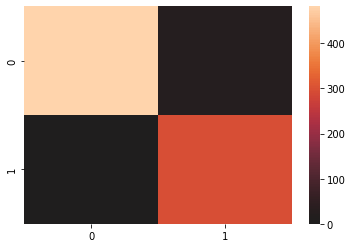

In [25]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True )
plt.show()

In [26]:
#Calculating classification Report :  
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      0.95      0.98       505
           1       0.93      1.00      0.96       295

    accuracy                           0.97       800
   macro avg       0.96      0.98      0.97       800
weighted avg       0.97      0.97      0.97       800



In [27]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.97125


In [28]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

#----------------------------------------------------
#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  0.02875
Mean Squared Error Value is :  0.02875
Median Absolute Error Value is :  0.0


In [29]:
#Applying KNeighborsClassifier Model 

KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform',  algorithm='auto')

KNNClassifierModel.fit(X_train, y_train)

#Calculating Details
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = KNNClassifierModel.predict(X_test)
y_pred_prob = KNNClassifierModel.predict_proba(X_test)
print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])

KNNClassifierModel Train Score is :  0.9908847184986596
KNNClassifierModel Test Score is :  0.98375
Predicted Value for KNNClassifierModel is :  [1 1 1 0 1 0 0 1 0 1]
Prediction Probabilities Value for KNNClassifierModel is :  [[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [31]:
# I want to know the best K value that achieves Lowest error rate 

error_rate = []

for k in range(1,20):
    KNNClassifier = KNeighborsClassifier(n_neighbors = k )
    KNNClassifier.fit(X_train , y_train)
    y_pred = KNNClassifier.predict(X_test)
    error = 1 - accuracy_score(y_test , y_pred)
    
    error_rate.append(error)

Text(0.5, 0, 'K value')

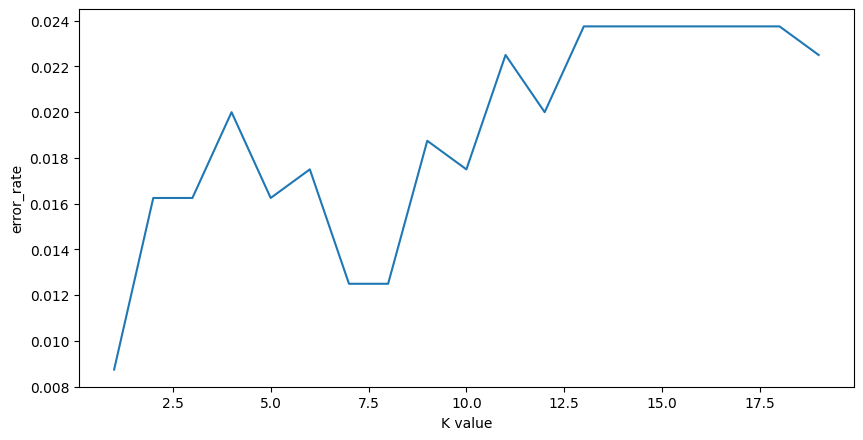

In [32]:

plt.figure(figsize=(10,5),dpi = 100)
plt.plot(range(1,20) , error_rate)
plt.ylabel('error_rate')
plt.xlabel('K value')

In [33]:
#  k=1 is the lowest error_rate
KNNClassifierModel2 = KNeighborsClassifier(n_neighbors= 1,weights ='uniform',  algorithm='auto')

KNNClassifierModel2.fit(X_train, y_train)

#Calculating Details
print('KNNClassifierModel2 Train Score is : ' , KNNClassifierModel2.score(X_train, y_train))
print('KNNClassifierModel2 Test Score is : ' , KNNClassifierModel2.score(X_test, y_test))
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = KNNClassifierModel2.predict(X_test)
y_pred_prob = KNNClassifierModel2.predict_proba(X_test)
print('Predicted Value for KNNClassifierModel2 is : ' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel2 is : ' , y_pred_prob[:10])

KNNClassifierModel2 Train Score is :  1.0
KNNClassifierModel2 Test Score is :  0.99125
Predicted Value for KNNClassifierModel2 is :  [1 1 1 0 1 0 0 1 0 1]
Prediction Probabilities Value for KNNClassifierModel2 is :  [[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


Confusion Matrix is : 
 [[504   1]
 [  6 289]]


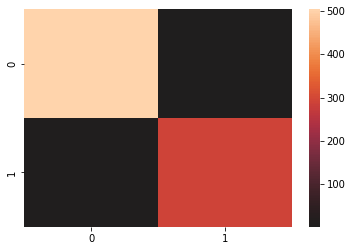

In [34]:
#Calculating Confusion Matrix for KNN model
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True )
plt.show()

In [35]:
#Calculating classification Report :  
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.99      1.00      0.99       505
           1       1.00      0.98      0.99       295

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

